In [439]:
import Oanda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
plt.style.use('seaborn')

In [440]:
oanda = Oanda.Oanda()
today = date.today()
startDate = today - timedelta(days=365*4)
spx_data = oanda.getHistoricalData("SPX500_USD",startDate, today,"D" )
btc_data = oanda.getHistoricalData("BTC_USD",startDate, today,"D" )

<Response [200]>
<Response [200]>


In [441]:
spx_data

,close,high,low,open,Year,Month,Day,Hour,Minute
0,2679.0,2730.5,2658.2,2718.4,2018,2,28,22,0
1,2690.0,2695.6,2647.0,2678.9,2018,3,1,22,0
2,2718.8,2727.4,2663.6,2683.2,2018,3,4,22,0
3,2723.4,2734.2,2710.2,2719.0,2018,3,5,22,0
4,2721.8,2730.0,2681.2,2692.4,2018,3,6,22,0
...,...,...,...,...,...,...,...,...,...
1028,4315.0,4361.6,4253.0,4269.5,2022,2,21,22,0
1029,4218.0,4348.5,4215.5,4315.5,2022,2,22,22,0
1030,4272.6,4292.6,4104.4,4220.1,2022,2,23,22,0
1031,4381.9,4385.9,4229.6,4270.4,2022,2,24,22,0


In [442]:
spx_data["Daily_Return"] = spx_data["close"].pct_change
btc_data["Daily_Return"] = btc_data["close"].pct_change

In [443]:
def createFeatures(data:pd.DataFrame) -> pd.DataFrame:
    data["Daily_Return"] = ((data["close"] - data["open"].shift(1))/data["open"].shift(1))  * 100
    data["Daily_candel"] = (data["close"] - data["open"])/data["open"]
    data["log_close"] = np.log(1+(data["close"]-data["close"].shift(1))/data["close"].shift(1))
    

In [444]:
createFeatures(spx_data)
createFeatures(btc_data)

In [445]:
spx_data

,close,high,low,open,Year,Month,Day,Hour,Minute,Daily_Return,Daily_candel,log_close
0,2679.0,2730.5,2658.2,2718.4,2018,2,28,22,0,NaN,-0.014494,NaN
1,2690.0,2695.6,2647.0,2678.9,2018,3,1,22,0,-1.044732,0.004143,0.004098
2,2718.8,2727.4,2663.6,2683.2,2018,3,4,22,0,1.489417,0.013268,0.010649
3,2723.4,2734.2,2710.2,2719.0,2018,3,5,22,0,1.498211,0.001618,0.001690
4,2721.8,2730.0,2681.2,2692.4,2018,3,6,22,0,0.102979,0.010920,-0.000588
...,...,...,...,...,...,...,...,...,...,...,...,...
1028,4315.0,4361.6,4253.0,4269.5,2022,2,21,22,0,-0.399326,0.010657,0.005158
1029,4218.0,4348.5,4215.5,4315.5,2022,2,22,22,0,-1.206230,-0.022593,-0.022736
1030,4272.6,4292.6,4104.4,4220.1,2022,2,23,22,0,-0.994091,0.012440,0.012861
1031,4381.9,4385.9,4229.6,4270.4,2022,2,24,22,0,3.834032,0.026110,0.025260


<AxesSubplot:>

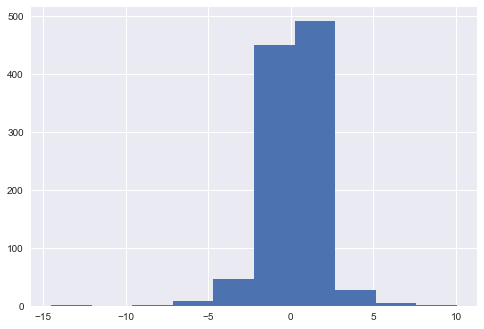

In [446]:
spx_data["Daily_Return"].hist()

<AxesSubplot:>

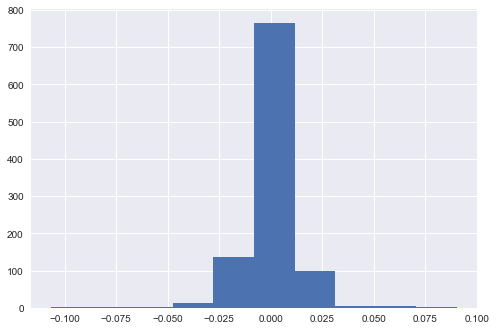

In [447]:
spx_data["Daily_candel"].hist()

<AxesSubplot:>

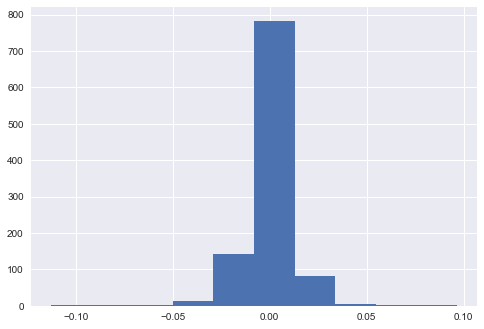

In [448]:
spx_data["log_close"].hist()

<AxesSubplot:>

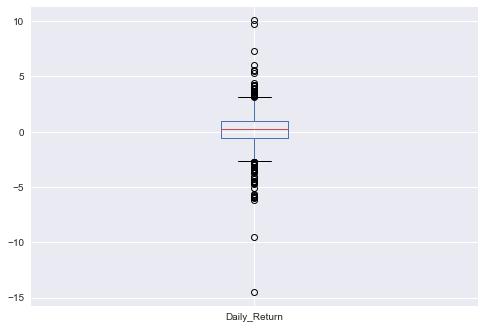

In [449]:
spx_data.boxplot(column=["Daily_Return"], return_type="axes")

<AxesSubplot:>

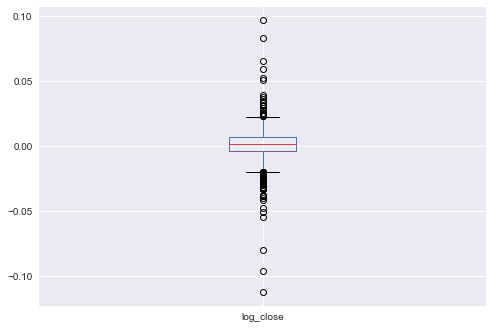

In [450]:
spx_data.boxplot(column=["log_close"], return_type="axes")

<AxesSubplot:>

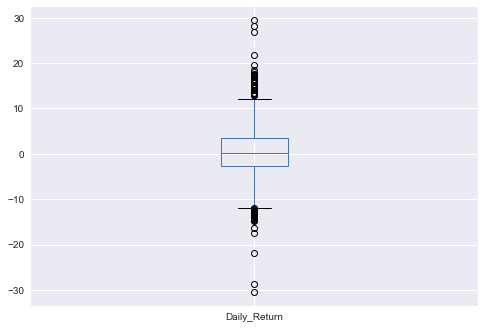

In [451]:
btc_data.boxplot(column=["Daily_Return"], return_type="axes")

<AxesSubplot:>

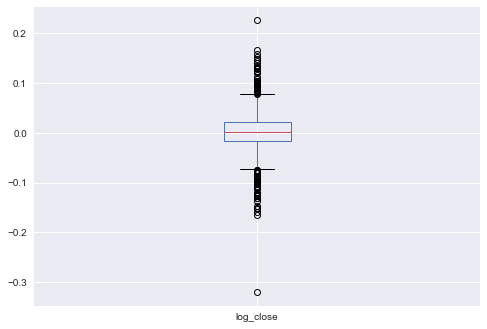

In [452]:
btc_data.boxplot(column=["log_close"], return_type="axes")

In [453]:
def boxPlotYearReturns(df: pd.DataFrame):
    """_summary_

    Args:
        column (pd.DataFrame): _description_
    """
    df_year = df[df["Year"] == 2018]
    df_year = df_year.rename(columns={"Daily_Return": "Daily_Return_"+str(2018)})
    df_year_len = len(df_year)
    for year in range(2019,2022):
        df_year_zw = df[df["Year"] == year]
        df_year_zw = df_year_zw["Daily_Return"].tolist()
        while(len(df_year_zw) > df_year_len):
            df_year_zw = df_year_zw[:-1]
        if len(df_year_zw) < df_year_len:
            for _ in range(df_year_len - len(df_year_zw)):
                df_year_zw.append(np.nan)
            
        df_year["Daily_Return_"+str(year)] = df_year_zw
    return df_year

In [454]:
year_df_btc = boxPlotYearReturns(btc_data)

<AxesSubplot:>

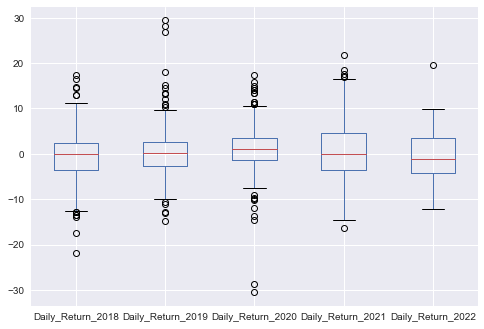

In [455]:
year_df_btc.boxplot(column=["Daily_Return_2018","Daily_Return_2019","Daily_Return_2020","Daily_Return_2021","Daily_Return_2022"], return_type="axes")

<AxesSubplot:>

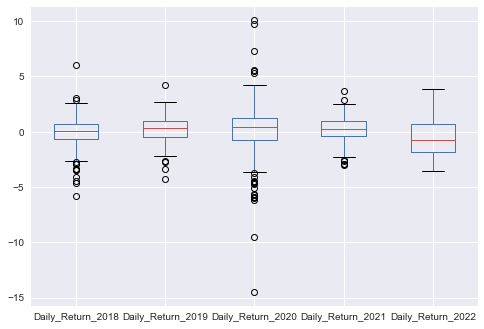

In [457]:
year_df_spx = boxPlotYearReturns(spx_data)
year_df_spx.boxplot(column=["Daily_Return_2018","Daily_Return_2019","Daily_Return_2020","Daily_Return_2021","Daily_Return_2022"], return_type="axes")